# Image Geometric transformation
![pandas](https://images.unsplash.com/photo-1649073586428-e288125d930a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1332&q=80)


photo by [julien Tromeur](https://unsplash.com/@julientromeur) at [Unsplash](https://unsplash.com/)


## Introduction

this is the companion colab code for my tutorial in medium about introduction to medical images in Python , please read the article for better understanding of the code.  
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)



note: the articles will be publish soon

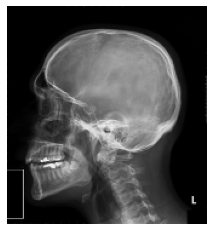

In [ ]:
#loading image from url
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import rescale
from skimage import  color
import scipy.ndimage as ndi
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Lat_lebka.jpg/330px-Lat_lebka.jpg"
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/AP_lumbar_xray.jpg/255px-AP_lumbar_xray.jpg"
a = io.imread(url)

im = color.rgb2gray(a)
#rescaling
a = image_rescaled = rescale(im, 0.5, anti_aliasing=False)
plt.imshow(a, cmap = "gray")
plt.axis('off')
plt.show()

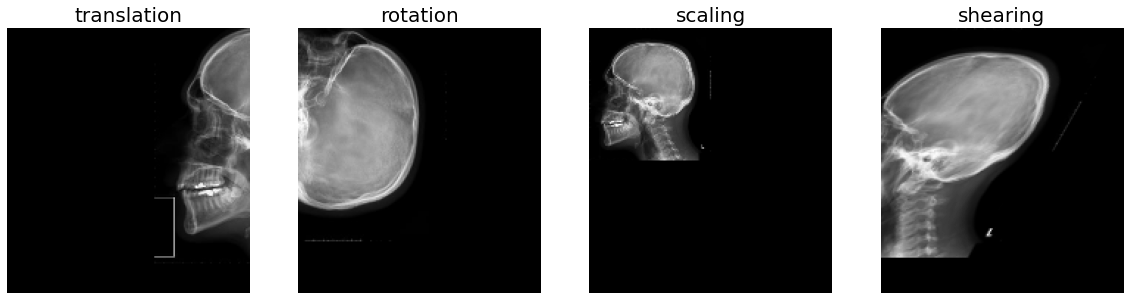

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage import img_as_float

transl = transform.EuclideanTransform(translation = (100, -20))
rot = transform.EuclideanTransform( translation = (100, -20), rotation=np.pi /2. )
scal = transform.SimilarityTransform(scale=0.5)
shear = transform.AffineTransform(shear=np.pi/6)

img = img_as_float(a)
transl_img = transform.warp(img, transl.inverse)
rot_img = transform.warp(img, rot.inverse)
scal_img = transform.warp(img, scal.inverse)
shear_img = transform.warp(img, shear.inverse)

fig, axes = plt.subplots(ncols=4,  sharex=True, sharey=True,
                         figsize=(20,5))

axes[0].imshow(transl_img, cmap = "gray")
axes[0].set_title('translation', fontsize = 20)

axes[1].imshow(rot_img, cmap=plt.cm.gray)
axes[1].set_title('rotation', fontsize = 20)

axes[2].imshow(scal_img, cmap=plt.cm.gray)
axes[2].set_title('scaling', fontsize = 20)

axes[3].imshow(shear_img, cmap=plt.cm.gray)
axes[3].set_title('shearing', fontsize = 20)

for ax in axes:
    ax.axis('off')


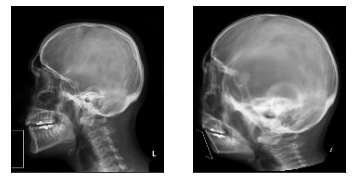

In [ ]:
from skimage import transform, data, io

import numpy as np
import matplotlib.pyplot as plt


def fisheye(xy):
    center = np.mean(xy, axis=0)
    xc, yc = (xy - center).T

    # Polar coordinates
    r = np.sqrt(xc**2 + yc**2)
    theta = np.arctan2(yc, xc)

    r = 0.8 * np.exp(r**(1/2.1) / 1.8)

    return np.column_stack((
        r * np.cos(theta), r * np.sin(theta)
        )) + center

out = transform.warp(a, fisheye)

f, (ax0, ax1) = plt.subplots(1, 2,
                             subplot_kw=dict(xticks=[], yticks=[]))
ax0.imshow(a, cmap= "gray")
ax1.imshow(out, cmap= "gray")

plt.show()